## (GSE48213): Identifying gene expression patterns associated with different breast cancer subtypes

The dataset includes both treated (estrogen) and control conditions. 
We use Adaptive CCA to identify differences in gene expression patterns between these conditions over time.

In [2]:
import os
import pandas as pd
import numpy as np

# file_path = os.path.join(os.getcwd(), "..", "data", "GSE48213")

In [4]:
def filter_rows_with_x_inplace(file_path: str) -> None:
    """
    Reads a file, filters rows ending with a lowercase 'x', and writes them back to the same file.

    Args:
    - file_path (str): Path to the file to be modified in place.
    """
    try:
        # Read the file and filter lines
        with open(file_path, "r") as file:
            lines = file.readlines()

        # Filter lines that end with 'x'
        filtered_lines = [line for line in lines if line.strip().endswith("x")]

        # Write the filtered lines back to the file
        with open(file_path, "w") as file:
            file.writelines(filtered_lines)

        print(f"File '{file_path}' has been updated with only rows ending in 'x'.")
    except FileNotFoundError as e:
        print(f"Error: File not found - {e}")
    except Exception as e:
        print(f"An unexpected error occurred - {e}")


file_path = os.path.join(os.getcwd(), "..", "data", "cell_lines", "cell_line_names.csv")
filter_rows_with_x_inplace(file_path)


# Now we delete the 'x' from the end of each line
def delete_x_from_rows_inplace(file_path: str) -> None:
    """
    Reads a file, removes the last character from each line, and writes them back to the same file.

    Args:
    - file_path (str): Path to the file to be modified in place.
    """
    try:
        # Read the file and filter lines
        with open(file_path, "r") as file:
            lines = file.readlines()

        # Remove the last character from each line
        modified_lines = [line[:-1] for line in lines]

        # Write the modified lines back to the file
        with open(file_path, "w") as file:
            file.writelines(modified_lines)

        print(
            f"File '{file_path}' has been updated with 'x' removed from the end of each row."
        )
    except FileNotFoundError as e:
        print(f"Error: File not found - {e}")
    except Exception as e:
        print(f"An unexpected error occurred - {e}")


delete_x_from_rows_inplace(file_path)

File 'c:\Users\anaca\Documents\quinto.curso\mitfg\cca_manifolds\ss24_CCA_Reduced_Rank\src\..\data\cell_lines\cell_line_names.csv' has been updated with only rows ending in 'x'.
File 'c:\Users\anaca\Documents\quinto.curso\mitfg\cca_manifolds\ss24_CCA_Reduced_Rank\src\..\data\cell_lines\cell_line_names.csv' has been updated with 'x' removed from the end of each row.


In [6]:
# Save the list of cell lines for which research was done
import json

cell_lines_filtered = [
    "AU565",
    "HCC1143",
    "HCC1395",
    "HCC1419",
    "HCC1428",
    "HCC1569",
    "HCC1599",
    "HCC1806",
    "HCC1937",
    "HCC1954",
    "HCC202",
    "HCC2218",
    "HCC38",
    "HCC70",
    "MCF7",
    "T47D",
]

filepath = os.path.join(
    os.getcwd(), "..", "data", "cell_lines", "cell_line_names_filtered.json"
)
with open(filepath, "w") as json_file:
    json.dump(cell_lines_filtered, json_file)
print("List saved to 'cell_line_names_filtered.json'")

List saved to 'cell_line_names_filtered.json'


Dataset overview:

- 56 breast cancer cell lines were profiled
- The data represents gene expression levels in these cell lines
- Each cell line is in an unperturbed, baseline state


In current file: 

1. Column 1 (EnsEMBL_Gene_ID): unique identifier for each gene from the Ensembl database.
2. Column 2 (e.g., MDAMB453): expression value for each gene in the specific cell line.

These are normalized read counts or FPKM/TPM values (Fragments/Transcripts Per Kilobase Million).
Higher values indicate higher expression of the gene in that cell line, zero values indicate that the gene is not expressed (or expression is below detection threshold)


In [ ]:
from utils.utils import combine_data

data = combine_data(file_path)

Combined data already exists. Loading from file.


In [3]:
print(data.head())

                 GSM1172844_184A1  GSM1172845_184B5  GSM1172846_21MT1  \
EnsEMBL_Gene_ID                                                         
ENSG00000000003         95.212548         95.698676         19.994674   
ENSG00000001167         89.512619         94.154375        245.433541   
ENSG00000005471          0.000000          0.172734          0.231762   
ENSG00000066629         24.701397          7.633869          5.842132   
ENSG00000154258          0.000000          2.683498          0.000000   

                 GSM1172847_21MT2  GSM1172848_21NT  GSM1172849_21PT  \
EnsEMBL_Gene_ID                                                       
ENSG00000000003         65.686376        44.057746        34.317565   
ENSG00000001167        216.487072       286.092419       289.298295   
ENSG00000005471          0.099938         0.000000         0.000000   
ENSG00000066629          6.773438         5.149179         7.432176   
ENSG00000154258          0.031877         0.000000         0.0

In [7]:
from utils.utils import classify_cancerous_celllines

data = classify_cancerous_celllines()
data.head()

Cell lines stored in c:\Users\anaca\Documents\quinto.curso\mitfg\cca_manifolds\ss24_CCA_Reduced_Rank\src\..\data\cell_lines
Classification complete.


,0
0,184A1
1,184B5
2,21MT1
3,21MT2
4,21NT


In [16]:
import requests
from bs4 import BeautifulSoup

file_path = os.path.join(os.getcwd(), "..", "data", "cell_lines", "cell_line_names.csv")
cell_lines = pd.read_csv(file_path)

### Key Drug Classes
**Most clinically relevant drug classes for breast cancer treatment:**

    HER2 inhibitors (e.g., trastuzumab, lapatinib)
    Hormone therapy drugs (e.g., tamoxifen, aromatase inhibitors)
    PARP inhibitors (e.g., olaparib)
    CDK4/6 inhibitors (e.g., palbociclib)
    PI3K inhibitors (e.g., alpelisib)


**Stepwise Analysis**

    Drug sensitivity profiling:
        Rank cell lines based on their sensitivity to each drug class.
        Identify highly sensitive and resistant cell lines for each drug class.
    Gene expression analysis:
        Compare gene expression profiles between sensitive and resistant cell lines for each drug class.
        Use differential expression analysis to identify genes significantly up or downregulated in sensitive vs. resistant lines.
    Canonical Correlation Analysis (CCA):
        Perform CCA between gene expression data and drug sensitivity scores for each drug class.
        Identify genes with high correlation coefficients to drug sensitivity.
    Pathway analysis:
        Conduct pathway enrichment analysis on the genes identified from steps 2 and 3.
        This can reveal biological processes and pathways associated with drug sensitivity or resistance.

*Key Genes to Consider*

    C19orf33: Correlated with resistance to multiple drugs, especially DNA synthesis inhibitors and cell cycle inhibitors1
    FGFR2: Associated with sensitivity to specific drugs1
    BCL2: Key for predicting sensitivity to venetoclax1
    NQO1: Inversely correlated with sensitivity to HSP90 inhibitors like tanespimycin1
    ADK: Predictive of sensitivity to AICAR1
    PBX2 and RAD52: Prognostic for breast cancer survival outcomes2
    FGF2, S100P, IRF5, MAP2K2, ZBTB7B: Differentially expressed in breast cancer patient blood samples2
    

In [17]:
# Define drug classes and example drugs
drug_classes = {
    "HER2 inhibitors": ["lapatinib"],
    "Hormone therapy": ["tamoxifen", "anastrozole", "letrozole", "exemestane"],
    "PARP inhibitors": ["olaparib"],
    "CDK4/6 inhibitors": ["palbociclib"],
    "PI3K inhibitors": ["alpelisib"],
}


# Function to get drug sensitivity (Z-scores) data for a cell line
def get_sensitivity_data(cell_line: str):
    url = f"https://www.cancerrxgene.org/celllines/{cell_line}"
    response = requests.get(url)

    # Check if the request was successful
    if response.status_code != 200:
        print(f"Failed to retrieve data for {cell_line}: {response.status_code}")
        return {}

    soup = BeautifulSoup(response.content, "html.parser")

    sensitivity_data = {}

    # Loop through each drug class and its drugs
    for drug_class, drugs in drug_classes.items():
        for drug in drugs:
            # Find the Z-score for the specific drug
            drug_element = soup.find("td", string=drug)
            if drug_element:
                z_score_element = drug_element.find_next(
                    "td"
                )  # Assuming Z-score is in the next cell
                if z_score_element:
                    z_score = z_score_element.text.strip()
                    sensitivity_data[drug_class] = z_score
                break  # Exit loop after finding the first match

    return sensitivity_data


# Process each cell line and collect results
results = []
for cell_line in cell_lines:
    sensitivity = get_sensitivity_data(cell_line)
    sensitivity["cell_line"] = cell_line  # Add the cell line name to the results
    results.append(sensitivity)

# Create DataFrame and save to CSV
df_results = pd.DataFrame(results)
df_results.to_csv("drug_sensitivity_z_scores.csv", index=False)

print("Drug sensitivity Z-scores have been saved to 'drug_sensitivity_z_scores.csv'.")

Failed to retrieve data for 184A1: 404
Drug sensitivity Z-scores have been saved to 'drug_sensitivity_z_scores.csv'.


Drugs and Targets:

    Drug: The name of the compound tested.
    Targets: Molecular targets of the drug. For example:
        Lapatinib: Targets EGFR and ERBB2, both of which are often overexpressed in HER2-positive breast cancer.
        Afatinib: Targets EGFR and ERBB2, similar to Lapatinib.
        Rapamycin: Targets MTORC1, a key protein in cell growth and metabolism.
    Drugs without a listed target (e.g., Acetalax, 741909) might be experimental or have unknown mechanisms of action.

Z-Score:

    Measures how sensitive AU565 is to the drug compared to the average response across all tested cell lines.
    Negative Z-scores indicate increased sensitivity (lower IC50 compared to average).
    Positive Z-scores indicate resistance (higher IC50 compared to average).

#### Preprocessing: Log2 Transformation
Gene expression values vary too much across genes and cell lines, with some genes having very high expression values and others having very low ones (sometimes even zero). This creates a skewed distribution. A log2 transformation helps to normalize this range and make the data more comparable across genes and cell lines.
- without log transformation, highly expressed genes dominate the analysis, hiding patterns in the data for moderately or lowly expressed genes.

In [6]:
# ---------- PREPROCESSING ----------  # -> only for plotting purposes, included later on preprocessing.py
from preprocessing import log2_transform

log2_data = log2_transform(data)

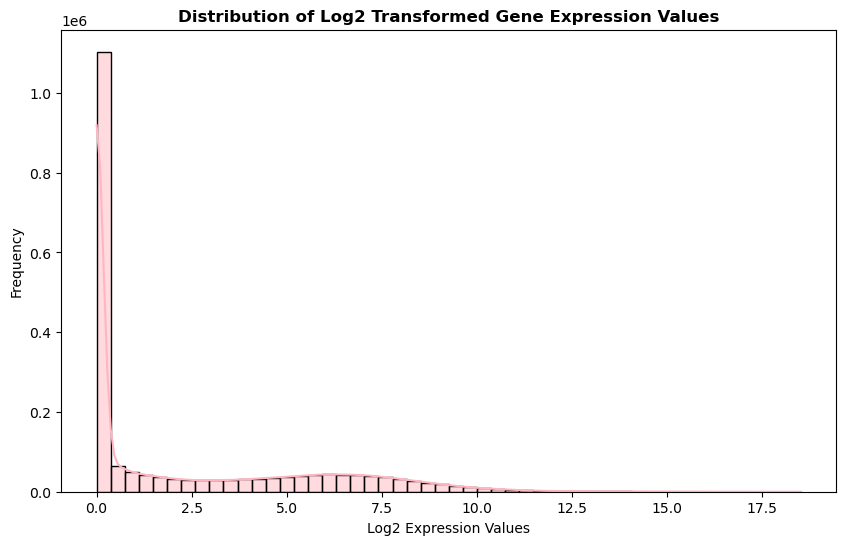

C:\Users\anaca\AppData\Local\Temp\ipykernel_17072\1541363489.py:27: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  ax = sns.boxplot(data=data, palette=colors)
C:\Users\anaca\AppData\Local\Temp\ipykernel_17072\1541363489.py:27: UserWarning: 
The palette list has fewer values (14) than needed (56) and will cycle, which may produce an uninterpretable plot.
  ax = sns.boxplot(data=data, palette=colors)


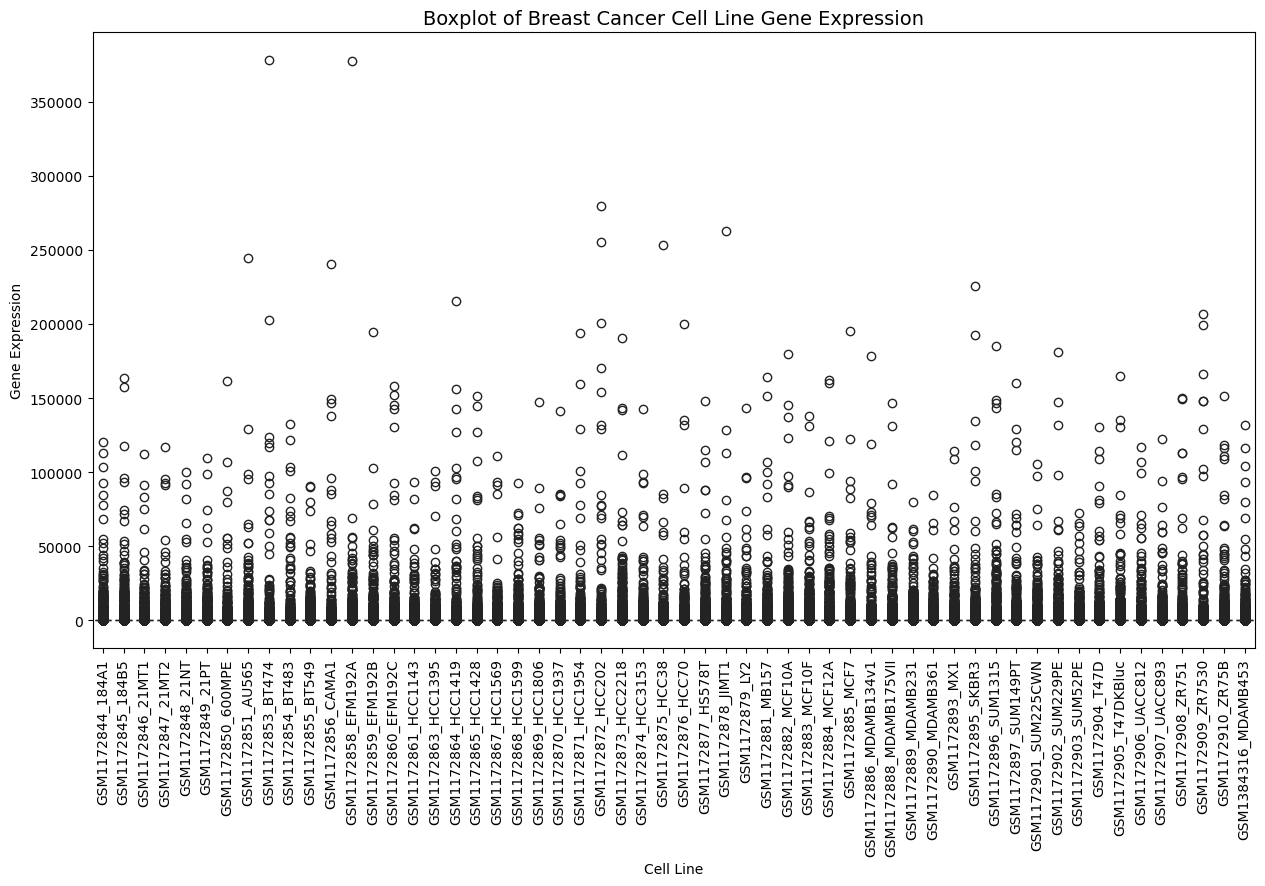

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


def plot_distribution(log2_transformed_data: pd.DataFrame):
    """
    Plots the distribution of log2 transformed gene expression data.

    Arguments:
    - log2_transformed_data: DataFrame with the log2 transformed gene expression values.
    """
    # Exclude the gene ID column
    expression_data = log2_transformed_data.iloc[:, 1:]

    # Histogram
    plt.figure(figsize=(10, 6))
    sns.histplot(expression_data.values.flatten(), bins=50, kde=True, color="lightpink")
    plt.title(
        "Distribution of Log2 Transformed Gene Expression Values", fontweight="bold"
    )
    plt.xlabel("Log2 Expression Values")
    plt.ylabel("Frequency")
    plt.show()

    """
    cmap = plt.cm.Blues
    colors = cmap(np.linspace(0.3, 1, 14))  # Generating shades of blue
    
    plt.figure(figsize=(15, 8))
    ax = sns.boxplot(data=data, palette=colors)
    
    plt.title("Boxplot of Breast Cancer Cell Line Gene Expression", fontsize=14)
    plt.xticks(rotation=90)
    plt.xlabel("Cell Line")
    plt.ylabel("Gene Expression")
    plt.show()
    """


plot_distribution(log2_data)

If many genes have low expression levels (values close to 1 after normalization), the log2-transformed data will have a concentration of values around 0. Many genes may simply be at low or non-expressed levels in certain cell lines, leading to this clustering around log2(expression) ≈ 0 in the data.

In [8]:
def adjust_cell_lines():
    """
    Adjusts the cell line names to match the cell line names in the expression data.

    Returns:
    - cell_lines: List of cell line names.
    """
    parent_dir = os.path.join(os.getcwd(), "..", "data", "cell_line_subtypes.csv")
    expression_data = pd.read_csv(parent_dir, index_col=0)  # Genes x Cell lines
    subtypes = expression_data["Subtype"][expression_data["Subtype"] != "Unclassified"]
    expression_data = expression_data.loc[subtypes.index]
    print(expression_data)


adjust_cell_lines()

                     Subtype
GSM1172908_ZR751   Luminal A
GSM1172909_ZR7530  Luminal A
GSM1172910_ZR75B   Luminal A


Of all data employed, no enough cell lines can be classified, leading to poor data information.

In [9]:
from utils.utils import classify_genes_in_pathways

classify_genes_in_pathways()

1 input query terms found dup hits:	[('ENSG00000188660', 2)]
12360 input query terms found no hit:	['ENSG00000154474', 'ENSG00000154537', 'ENSG00000154768', 'ENSG00000154999', 'ENSG00000155130', 'ENS


Total genes in your data: 36953
Genes mapped to KEGG pathways: 7511
Percentage of genes mapped: 20.33%

First few gene-pathway mappings:
                        Pathway_1               Pathway_2  \
ENSG00000114770  ABC transporters                    None   
ENSG00000167972  ABC transporters                    None   
ENSG00000001626  ABC transporters  AMPK signaling pathway   
ENSG00000143921  ABC transporters          Bile secretion   
ENSG00000198691  ABC transporters                    None   

                              Pathway_3                     Pathway_4  \
ENSG00000114770                    None                          None   
ENSG00000167972                    None                          None   
ENSG00000001626          Bile secretion        Gastric acid secretion   
ENSG00000143921  Cholesterol metabolism  Fat digestion and absorption   
ENSG00000198691                    None                          None   

                            Pathway_5       Pathway_6  \


In [10]:
filepath_combined = os.path.join(os.getcwd(), "..", "data", "combined_data.txt")
filepath_pathway = os.path.join(os.getcwd(), "..", "data", "gene_pathway_mappings.csv")
gene_expression = pd.read_csv(filepath_combined, sep="\t", index_col=0)
gene_pathway_mappings = pd.read_csv(filepath_pathway, index_col=0)

In [11]:
from preprocessing import preprocessing

X, Y = preprocessing(gene_expression, gene_pathway_mappings)
n, p1 = X.shape
_, p2 = Y.shape
k = min(p1, p2, 10)

Missing values in gene expression data:
0
Shape of X (gene expression): (56, 36953)
Shape of Y (pathway activity): (56, 113)


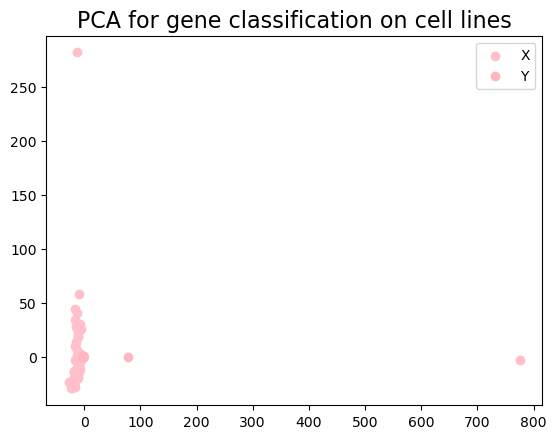

In [12]:
from visualize import apply_pca, plot_pca

X_pca, Y_pca = apply_pca(X, Y, k)
plot_pca(X_pca, Y_pca)

In [ ]:
from cca_functions import run_experiment

# Run experiment
k_values = [5, 10, 15, 20]
retraction_methods = ["cholesky", "polar"]
results, scores = run_experiment(X, Y, k_values, retraction_methods)

print(results)

In [ ]:
# Plot stability
data = pd.read_csv("stability.csv", header=0)
print(data.head())
print(data.columns)  # Print the column names to confirm they are loaded correctly

   Iteration          A_l1        A_inf          B_l1        B_inf  G_A_l1  \
0          0  1.536280e+02     0.144576      8.896645     2.395394     1.0   
1          1  1.590594e+04    11.744547     97.238422     8.890700     1.0   
2          2  9.831938e+05   697.790138   9119.254031  1600.922421     1.0   
3          3  3.111835e+06  1611.352159  18159.254031  1448.890700     1.0   
4          4  5.400321e+06  2316.260365  27199.254031  3040.922421     1.0   

   G_A_inf  G_B_l1  G_B_inf  
0      1.0     1.0      1.0  
1      1.0     1.0      1.0  
2      1.0     1.0      1.0  
3      1.0     1.0      1.0  
4      1.0     1.0      1.0  
Index(['Iteration', 'A_l1', 'A_inf', 'B_l1', 'B_inf', 'G_A_l1', 'G_A_inf',
       'G_B_l1', 'G_B_inf'],
      dtype='object')


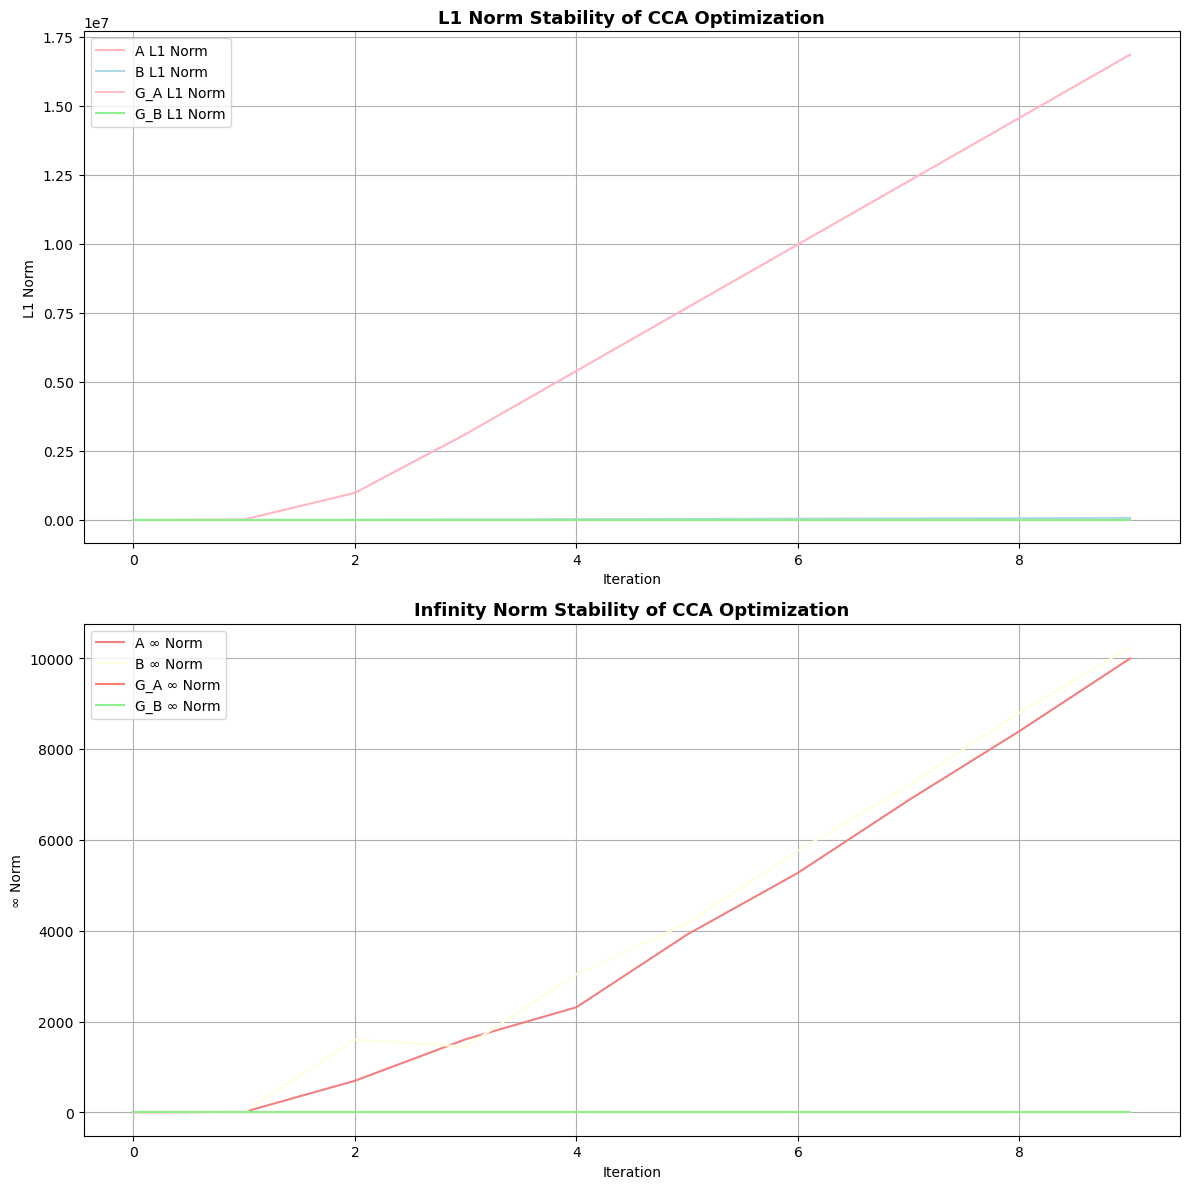

In [ ]:
plt.figure(figsize=(12, 12))

# Plot L1 norms
plt.subplot(2, 1, 1)
plt.plot(data["Iteration"], data["A_l1"], color="lightpink", label="A L1 Norm")
plt.plot(data["Iteration"], data["B_l1"], color="lightblue", label="B L1 Norm")
plt.plot(data["Iteration"], data["G_A_l1"], color="pink", label="G_A L1 Norm")
plt.plot(data["Iteration"], data["G_B_l1"], color="lightgreen", label="G_B L1 Norm")
plt.title("L1 Norm Stability of CCA Optimization", fontsize=13, fontweight="bold")
plt.xlabel("Iteration")
plt.ylabel("L1 Norm")
plt.grid()
plt.legend()

# Plot L∞ norms
plt.subplot(2, 1, 2)
plt.plot(data["Iteration"], data["A_inf"], color="lightcoral", label="A ∞ Norm")
plt.plot(data["Iteration"], data["B_inf"], color="lightyellow", label="B ∞ Norm")
plt.plot(data["Iteration"], data["G_A_inf"], color="salmon", label="G_A ∞ Norm")
plt.plot(data["Iteration"], data["G_B_inf"], color="lightgreen", label="G_B ∞ Norm")
plt.title("Infinity Norm Stability of CCA Optimization", fontsize=13, fontweight="bold")
plt.xlabel("Iteration")
plt.ylabel("∞ Norm")
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

TODO: check for instability in B matriz pathway data.

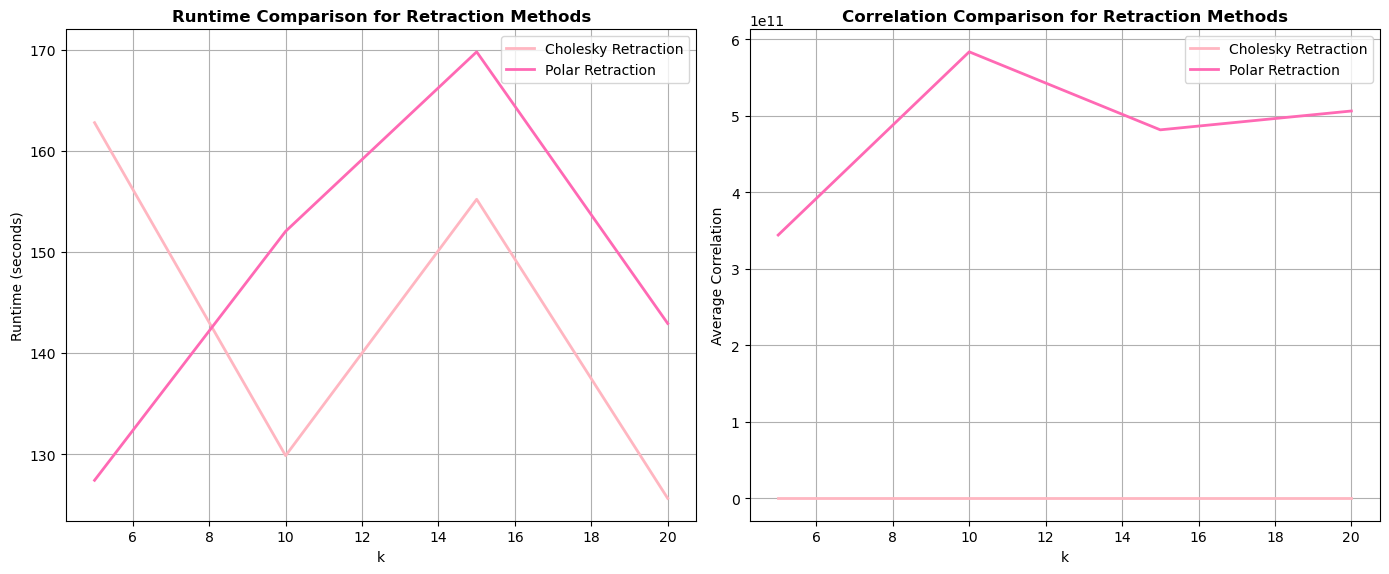

In [ ]:
def plot_results(results):
    """
    Plot the results of the CCA experiment.
    """
    cholesky_results = results[results["method"] == "cholesky"]
    polar_results = results[results["method"] == "polar"]
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # Plot runtime comparison
    ax1.plot(
        cholesky_results["k"],
        cholesky_results["runtime"],
        label="Cholesky Retraction",
        color="lightpink",
        linewidth=2,
    )
    ax1.plot(
        polar_results["k"],
        polar_results["runtime"],
        label="Polar Retraction",
        color="hotpink",
        linewidth=2,
    )
    ax1.set_xlabel("k")
    ax1.set_ylabel("Runtime (seconds)")
    ax1.set_title("Runtime Comparison for Retraction Methods", fontweight="bold")
    ax1.grid(True)
    ax1.legend()

    # Plot correlation comparison
    ax2.plot(
        cholesky_results["k"],
        cholesky_results["correlations"].apply(np.mean),
        label="Cholesky Retraction",
        color="lightpink",
        linewidth=2,
    )
    ax2.plot(
        polar_results["k"],
        polar_results["correlations"].apply(np.mean),
        label="Polar Retraction",
        color="hotpink",
        linewidth=2,
    )
    ax2.set_xlabel("k")
    ax2.set_ylabel("Average Correlation")
    ax2.set_title("Correlation Comparison for Retraction Methods", fontweight="bold")
    ax2.grid(True)
    ax2.legend()

    plt.tight_layout()
    plt.show()


plot_results(results)

In [ ]:
def plot_cca_scores(XA, YB, cell_line_labels, title="CCA Scores"):
    """
    Scatter plot of CCA scores for cell lines.

    Parameters:
    - XA : np.ndarray : CCA scores for X dataset (genes).
    - YB : np.ndarray : CCA scores for Y dataset (pathways).
    - cell_line_labels : list : Labels or IDs for each cell line.
    - title : str : Title of the plot.
    """
    # Convert to DataFrame for plotting convenience
    scores_df = pd.DataFrame(
        {
            "CCA1_X": XA[:, 0],
            "CCA2_X": XA[:, 1],
            "CCA1_Y": YB[:, 0],
            "CCA2_Y": YB[:, 1],
            "Cell Line": cell_line_labels,
        }
    )

    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        x="CCA1_X",
        y="CCA2_X",
        data=scores_df,
        hue="Cell Line",
        palette="viridis",
        s=100,
    )
    plt.xlabel("CCA Component 1 (Genes)")
    plt.ylabel("CCA Component 2 (Genes)")
    plt.title(f"{title} - Genes Projection")
    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.show()

    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        x="CCA1_Y",
        y="CCA2_Y",
        data=scores_df,
        hue="Cell Line",
        palette="viridis",
        s=100,
    )
    plt.xlabel("CCA Component 1 (Pathways)")
    plt.ylabel("CCA Component 2 (Pathways)")
    plt.title(f"{title} - Pathways Projection")
    plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
    plt.show()


def plot_canonical_correlations(correlations, title="Canonical Correlations Heatmap"):
    """
    Heatmap of the canonical correlations.

    Parameters:
    - correlations : np.ndarray : Array of canonical correlations.
    - title : str : Title of the plot.
    """
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        correlations.reshape(-1, 1),
        annot=True,
        cmap="coolwarm",
        cbar_kws={"label": "Correlation"},
    )
    plt.title(title)
    plt.xlabel("Canonical Components")
    plt.ylabel("Correlation Strength")
    plt.show()


def plot_explained_variance(
    correlations, title="Explained Variance by Canonical Component"
):
    """
    Bar plot of explained variance by canonical component.

    Parameters:
    - correlations : np.ndarray : Array of canonical correlations.
    - title : str : Title of the plot.
    """
    explained_variance = correlations**2  # Squared correlations to represent variance

    plt.figure(figsize=(10, 6))
    plt.bar(range(1, len(explained_variance) + 1), explained_variance, color="skyblue")
    plt.xlabel("Canonical Component")
    plt.ylabel("Explained Variance")
    plt.title(title)
    plt.show()

In [ ]:
# get the scores XA and YB for the first k value
scores_selection = scores[scores["k"] == 20]
XA = scores_selection["XA"].values[0]
YB = scores_selection["YB"].values[0]
print(XA.shape, YB.shape)

(56, 20) (56, 20)


In [ ]:
canonical_correlations = np.corrcoef(XA.T, YB.T).diagonal()
print("Canonical Correlations (manually calculated):", canonical_correlations)

Canonical Correlations (manually calculated): [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


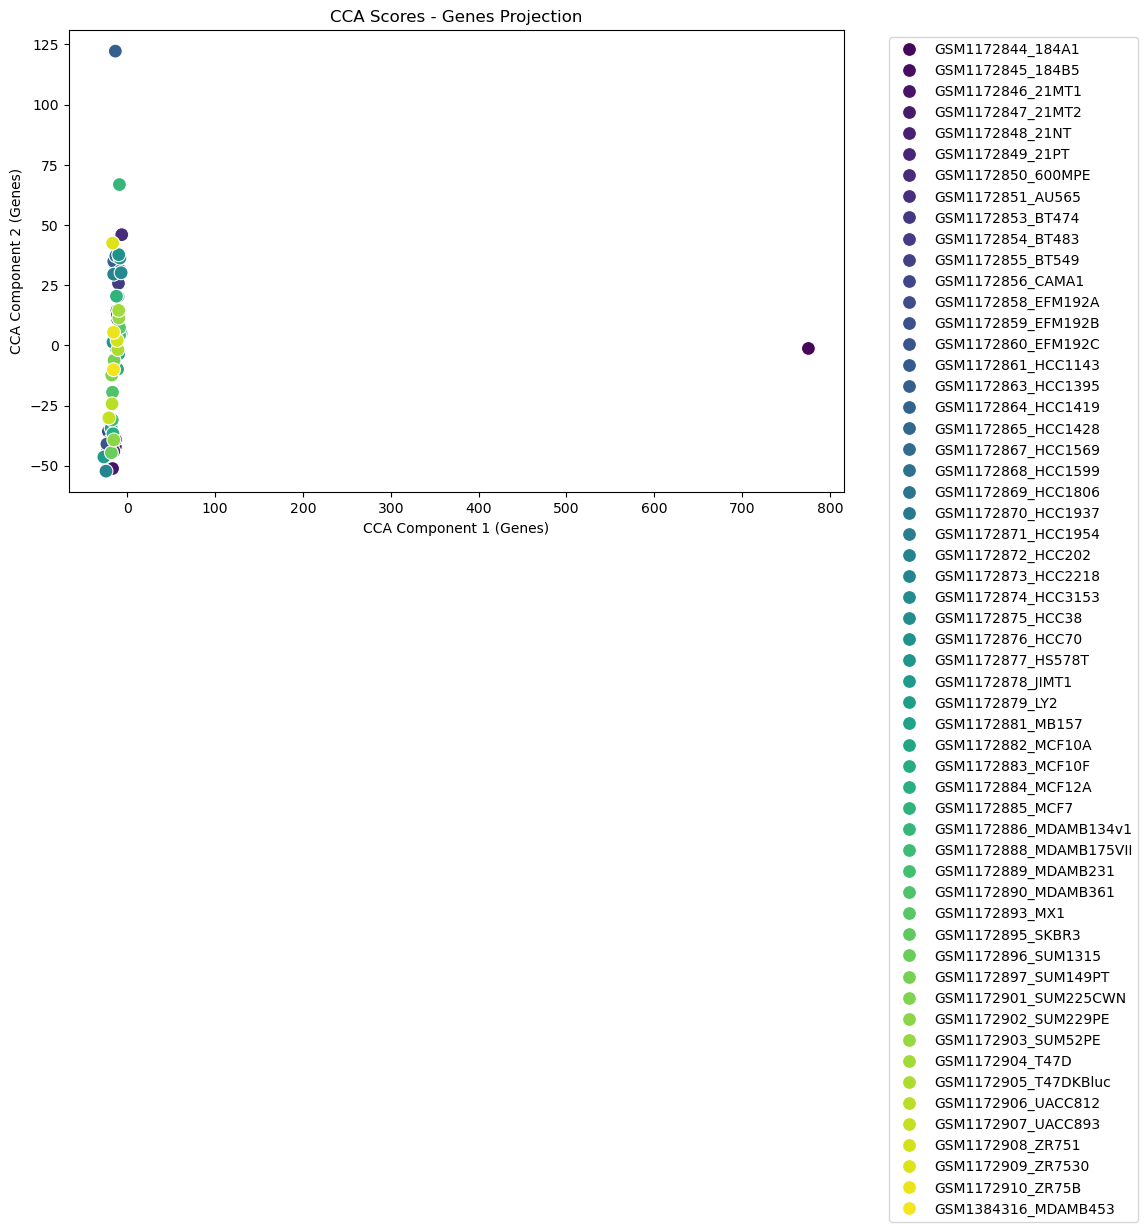

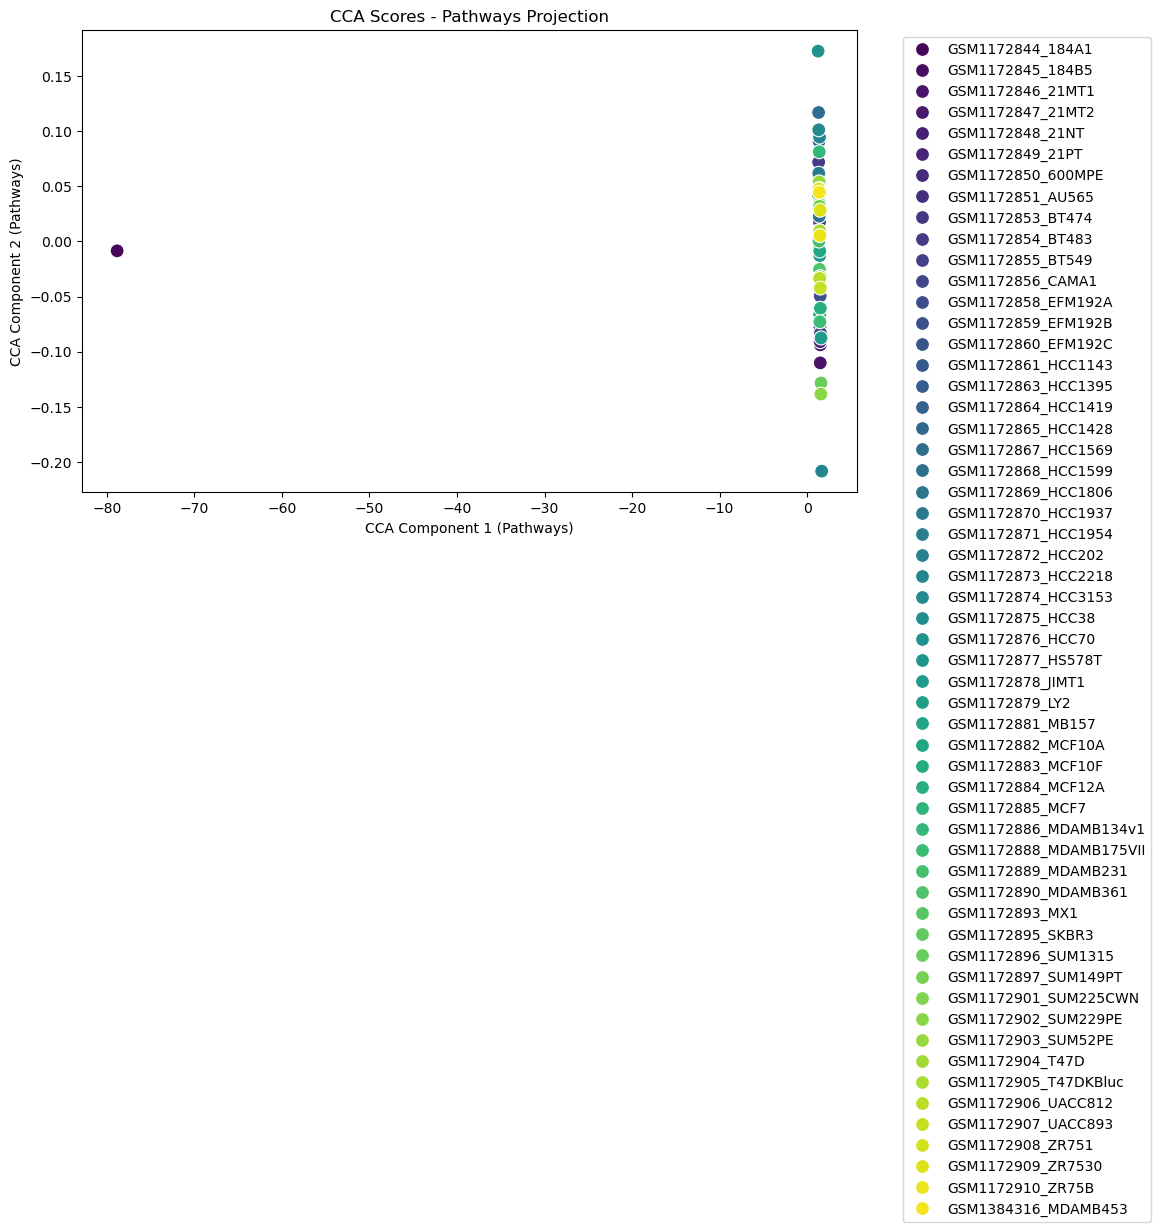

In [ ]:
cell_line_labels = gene_expression.columns
plot_cca_scores(XA, YB, cell_line_labels, title="CCA Scores")

In [ ]:
print("Variance of CCA scores (XA):", np.var(XA, axis=0))
print("Variance of CCA scores (YB):", np.var(YB, axis=0))
canonical_correlations = np.diag(np.corrcoef(XA.T, YB.T)[:k, k:])
print("Canonical Correlations:", canonical_correlations)

Variance of CCA scores (XA): [10956.87785065  1158.0902748    968.4146339    258.89123203
   302.25188513]
Variance of CCA scores (YB): [1.12990805e+02 4.99443376e-03 2.12282560e-03 4.76537097e-04
 5.60515484e-04]
Canonical Correlations: []


!!! Extreme low variance for some components of YB - lack of info in the Y projection (genes mapped poorly to pathways?)

Nearly all points in a CCA plot align on a vertical line at zero for CCA Component 1. This indicates that the first component has no variability, which could arise for several reasons:
- Zero or constant matrix values: If all values in XA_k5 (the transformed X dataset) are close to zero, this will force the points onto a vertical line. 
- Errors con computing scores.

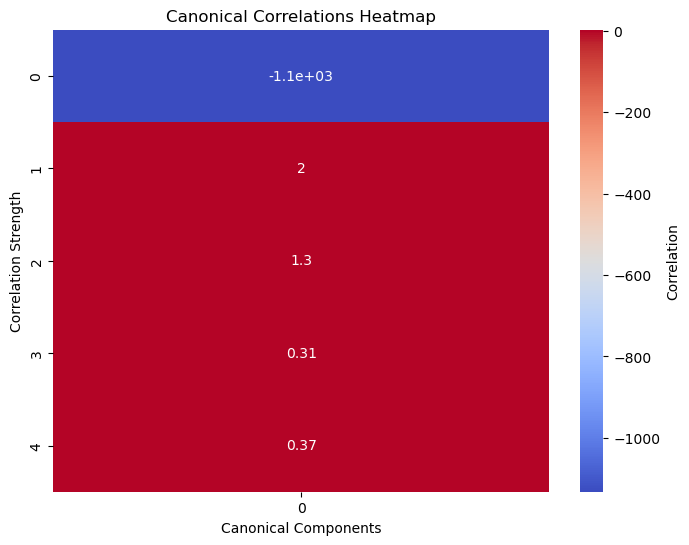

In [ ]:
plot_canonical_correlations(
    results["correlations"].values[0], title="Canonical Correlations Heatmap"
)

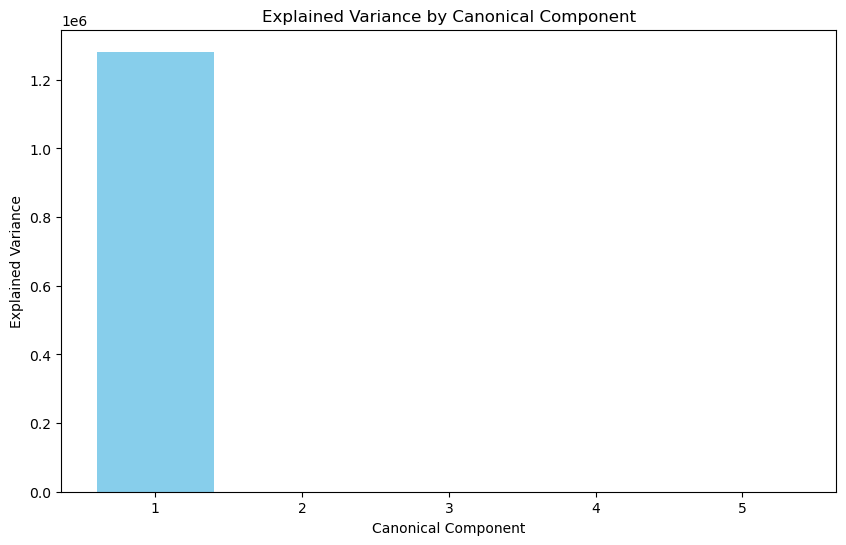

In [ ]:
plot_explained_variance(
    results["correlations"].values[0], title="Explained Variance by Canonical Component"
)

In [ ]:
# Compare geometrical to standard CCA
from cca_functions import standard_cca

X_st, Y_st, correlations_st, time_st = standard_cca(X, Y, 5)


# Cancer Cell Line Encyclopedia (CCLE) Dataset

## Overview

The Cancer Cell Line Encyclopedia (CCLE) project is a collaboration between the Broad Institute, the Novartis Institutes for Biomedical Research, and the Genomics Novartis Foundation. 
- detailed genetic and pharmacologic characterization of a large panel of human cancer models. This dataset consists of gene expression, chromosomal copy number, and massively parallel sequencing data from nearly 1,000 human cancer cell lines.

## Dataset Description

- **Title**: Expression data from the Cancer Cell Line Encyclopedia (CCLE)
- **Last Update Date**: March 13, 2018
- **Contact**: Nicolas Stransky (stransky@broadinstitute.org)

### Key Features

- **Gene Expression Data**: 
  - The dataset includes expression profiles for thousands of genes across various cancer cell lines.
  - Gene expression levels are typically measured using RNA-seq technology or microarrays.

- **Drug Sensitivity Data**:
  - The dataset provides information on the sensitivity of cancer cell lines to various anticancer drugs.
  - Drug response metrics are often represented as IC50 values (the concentration of drug required to inhibit cell growth by 50%).

### Data Accessibility

- The raw and processed data are available through an integrated portal on [Broad Institute CCLE](http://www.broadinstitute.org/ccle).
- Specific files can be accessed directly:
  - [Processed Gene Expression Data](https://data.broadinstitute.org/ccle/CCLE_Expression.csv)
  - [Drug Sensitivity Data](https://data.broadinstitute.org/ccle/CCLE_Drug_Sensitivity.csv)

### Research Applications

The CCLE dataset is highly relevant for cancer research and can be utilized to:

1. Analyze how gene expression correlates with sensitivity to specific anticancer drugs across different cell lines.
2. Identify potential biomarkers for drug response and resistance mechanisms.
3. Explore the molecular mechanisms underlying cancer biology through integrative analysis of gene expression and pharmacologic data.

## Citation

Barretina J, Caponigro G, Stransky N, Venkatesan K et al. The Cancer Cell Line Encyclopedia enables predictive modelling of anticancer drug sensitivity. Nature 2012 Mar 28;483(7391):603-7. PMID: 22460905.
